
![alternatvie text](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*UDi7KpyFX8gwV1k7aeMS-g.jpeg)
# Goal:

* Identify drivers of credit risk
* Create a machine learning model to predict credit risk

# Acquire Data
* Download data from https://www.kaggle.com/datasets/laotse/credit-risk-dataset?select=credit_risk_dataset.csv
* Save the data locally and pull it into your notebook
* Clone this repo to your machine and you can skip this step. 


In [1]:
#Import Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import prepare
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text


In [2]:
# Load the dataset from the cloned repo
df = pd.read_csv('credit_risk_dataset.csv')

In [3]:
# Take a look at the data
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
# Get a summary of your data
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


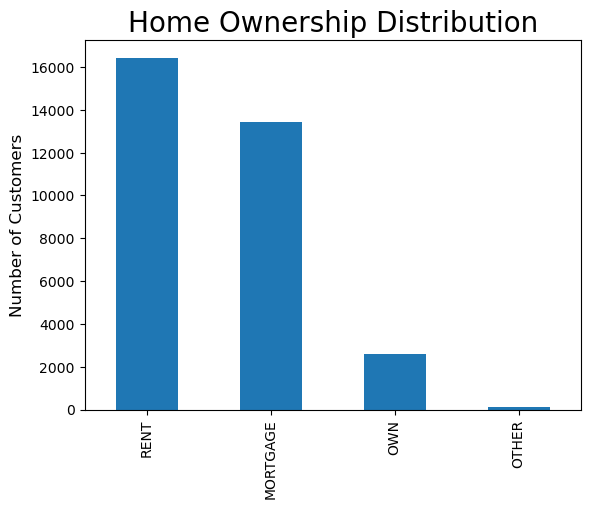

In [5]:
prepare.plot_distribution(df)

# Prepare
* Renamed the columns for readability
* Checked for and filled null values with the mean of the column
* Checked for and removed outliers
* Split data for exploration and modeling

In [6]:
# Prepared data for exploration and modeling
train, validate, test = prepare.prepare_credit(df)

In [7]:
# Verify split
train.shape, validate.shape, test.shape

((14651, 18), (6279, 18), (5233, 18))

# Exploration
* Take a look at the distribution of your training set
* Visualize drivers and perfrom hypothesis testing to verify findings


In [8]:
# Take a look at your data
train.head()

,age,income,emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cred_history,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,default_on_file_Y
11544,25,65000,0.0,1,10000,10.950000,0,0.15,2,0,0,1,1,0,0,0,0,0
16189,21,50000,5.0,2,9000,13.490000,0,0.18,2,0,0,0,0,0,0,1,0,0
7310,21,52000,1.0,2,16000,12.870000,0,0.31,4,0,0,0,1,0,0,0,0,0
24415,32,50911,7.0,2,10000,13.060000,0,0.20,7,0,0,1,0,0,0,1,0,0
13064,22,90000,6.0,1,12000,11.011695,0,0.13,4,0,0,1,0,0,0,0,1,0


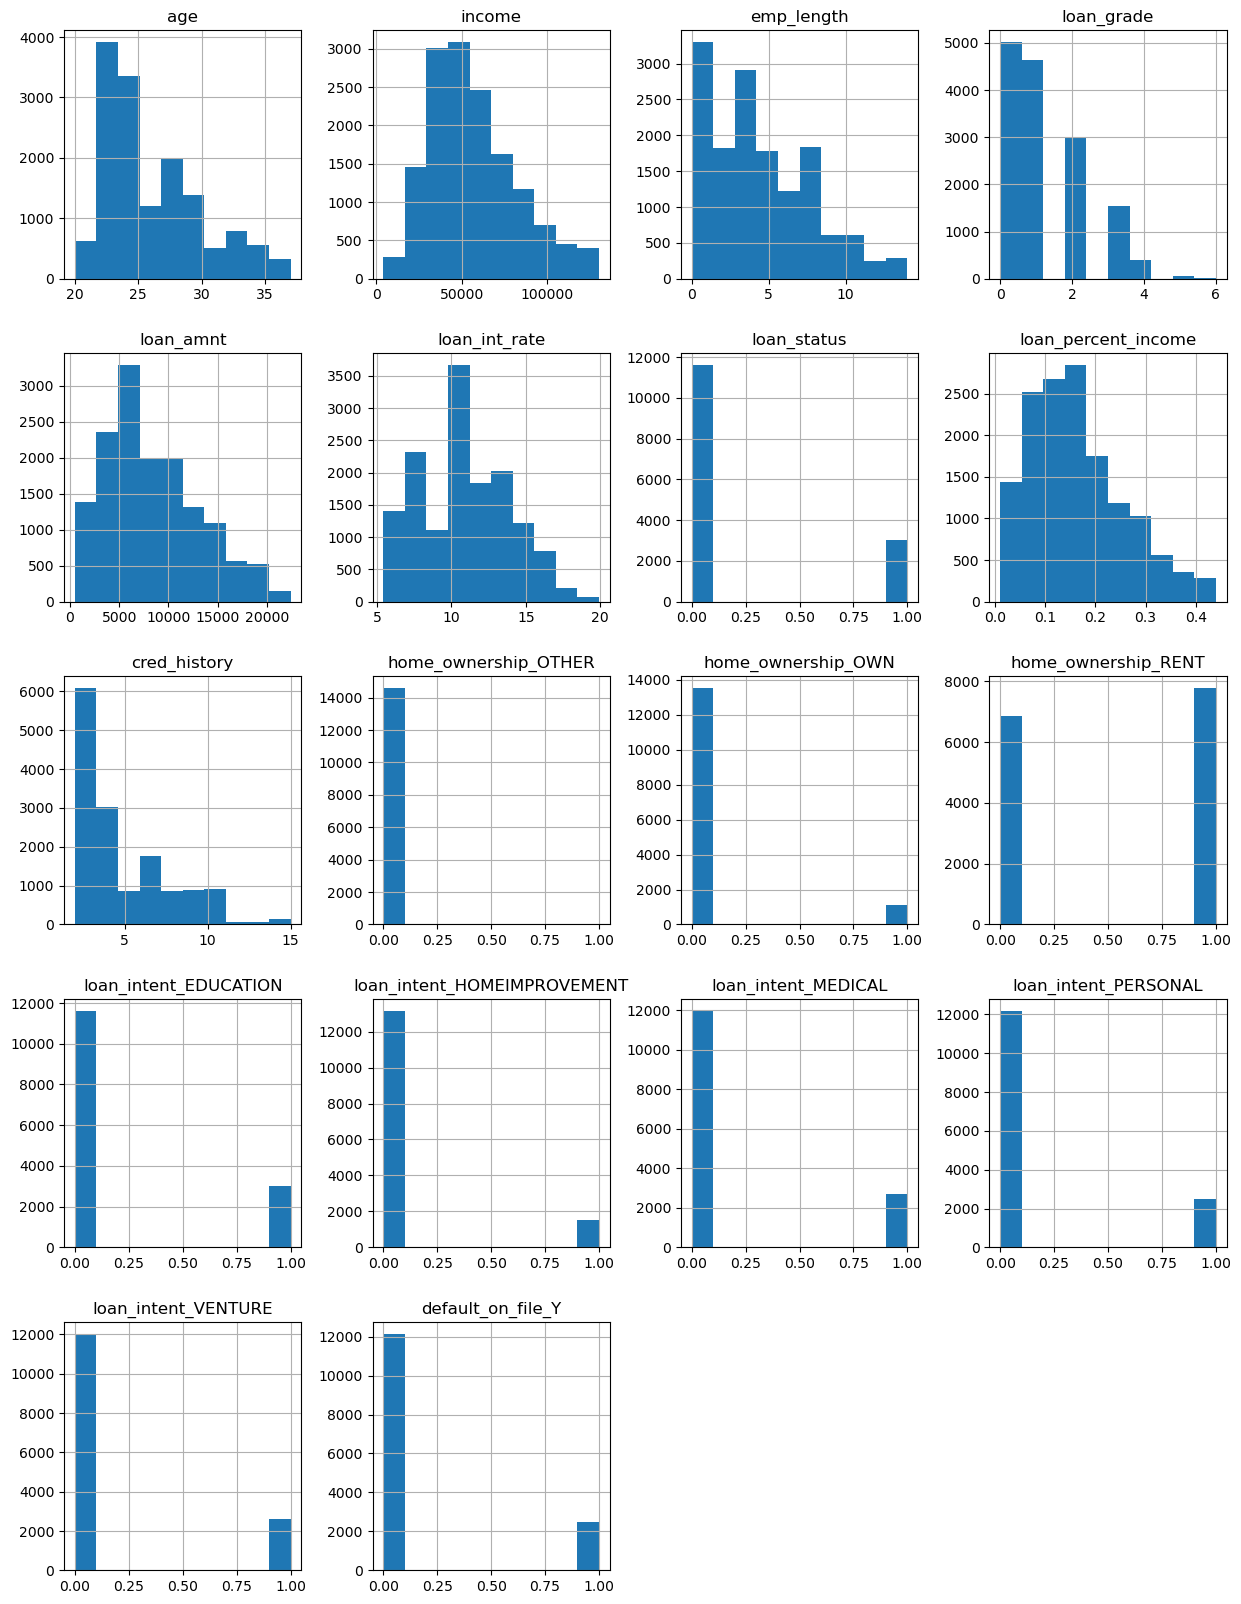

In [9]:
# Hist plot to show distribution of each column in the dataframe
prepare.hist_fig(train)

In [10]:
# Correlation breakdown of columns
prepare.corr(df)


loan_status                   1.000000
loan_percent_income           0.379366
loan_int_rate                 0.335133
loan_amnt                     0.105376
cb_person_cred_hist_length   -0.015529
person_age                   -0.021629
person_emp_length            -0.082489
person_income                -0.144449
dtype: float64


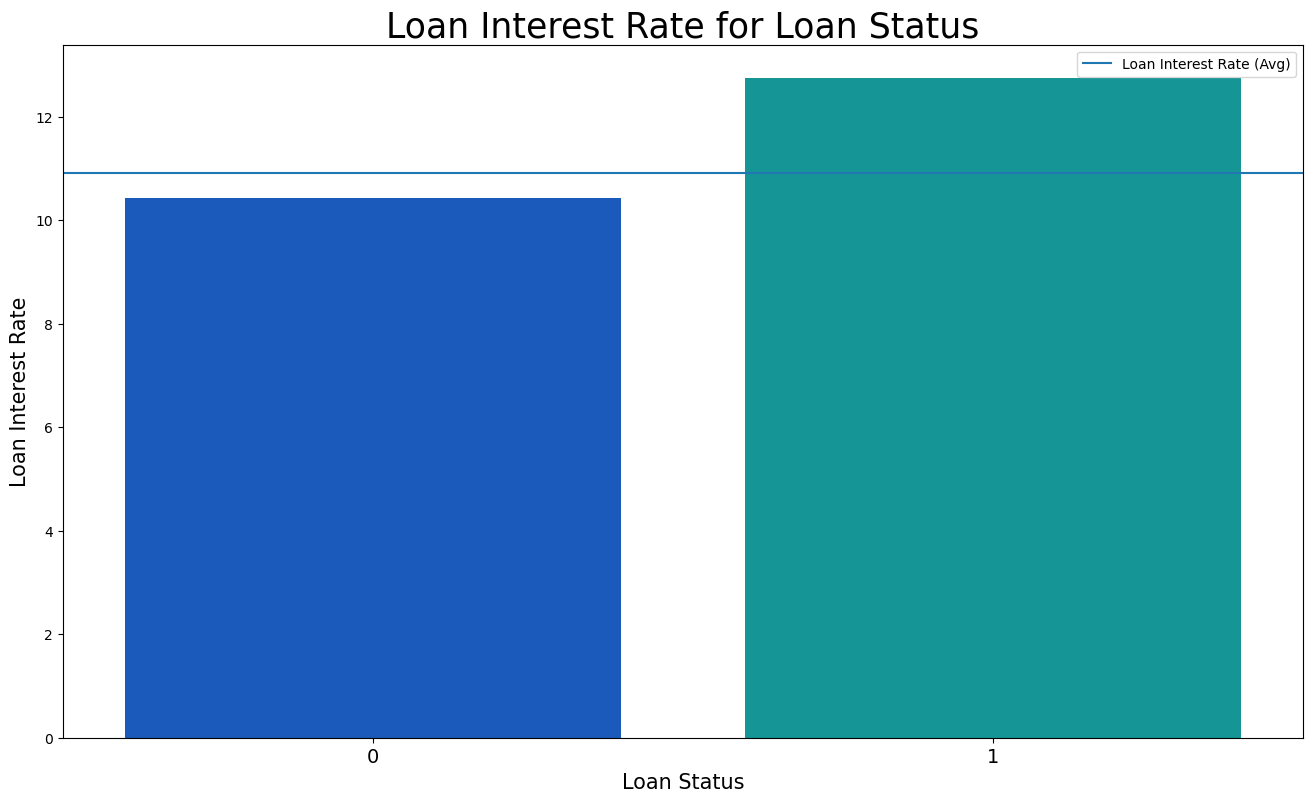

In [11]:
# Loan status by interest rate
prepare.loan_int_rate(train)

In [12]:
prepare.hypothesis_loan_int_rate(train)

 Reject the null hypothesis that loan_int_rate and loan_status are independent
 Sufficient evidence to move forward understanding that
 there is a relationship between loan_status and loan_int_rate


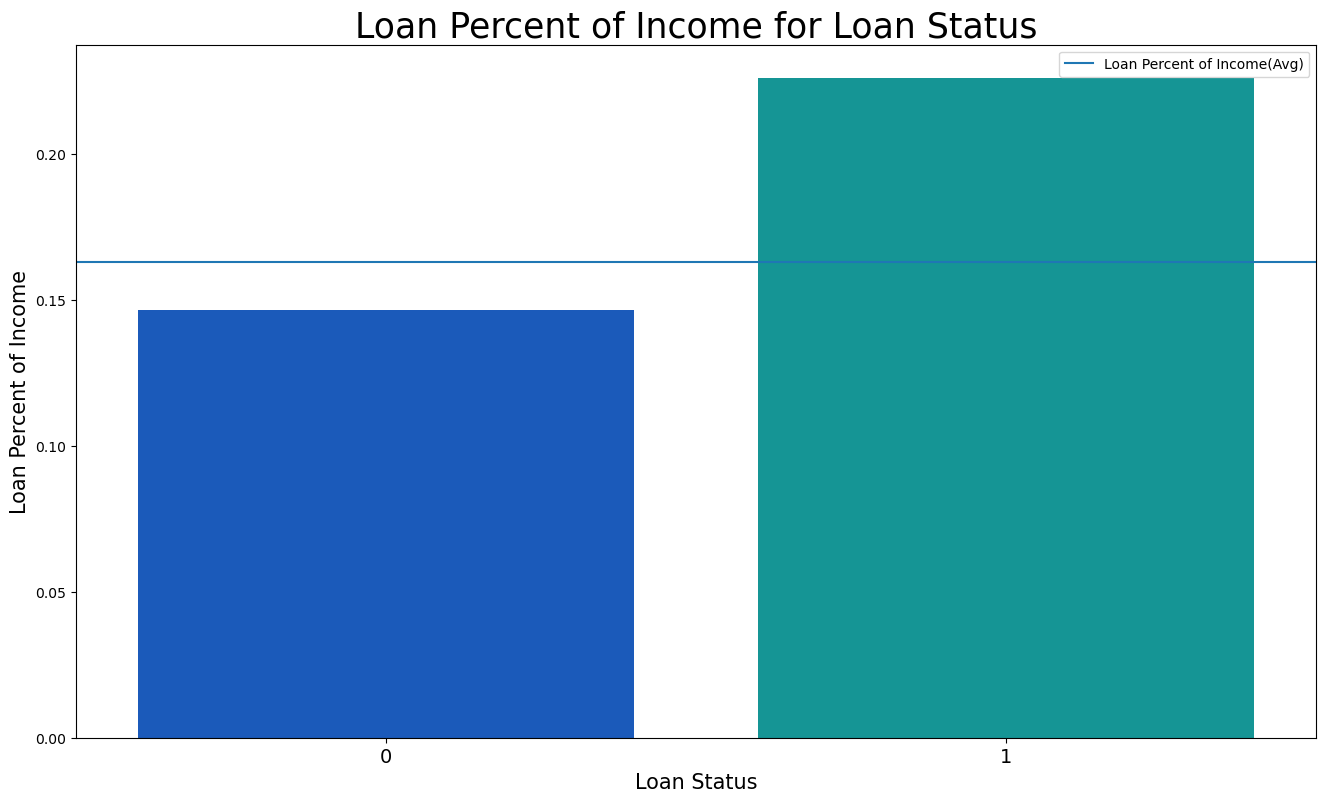

In [13]:
prepare.loan_perc_income(train)

In [14]:
prepare.hypothesis_loan_perc_income(train)

Reject the null hypothesis that loan_percent_income and loan_status are independent
Sufficient evidence to move forward understanding that there is a relationship between loan_status and loan_percent_income


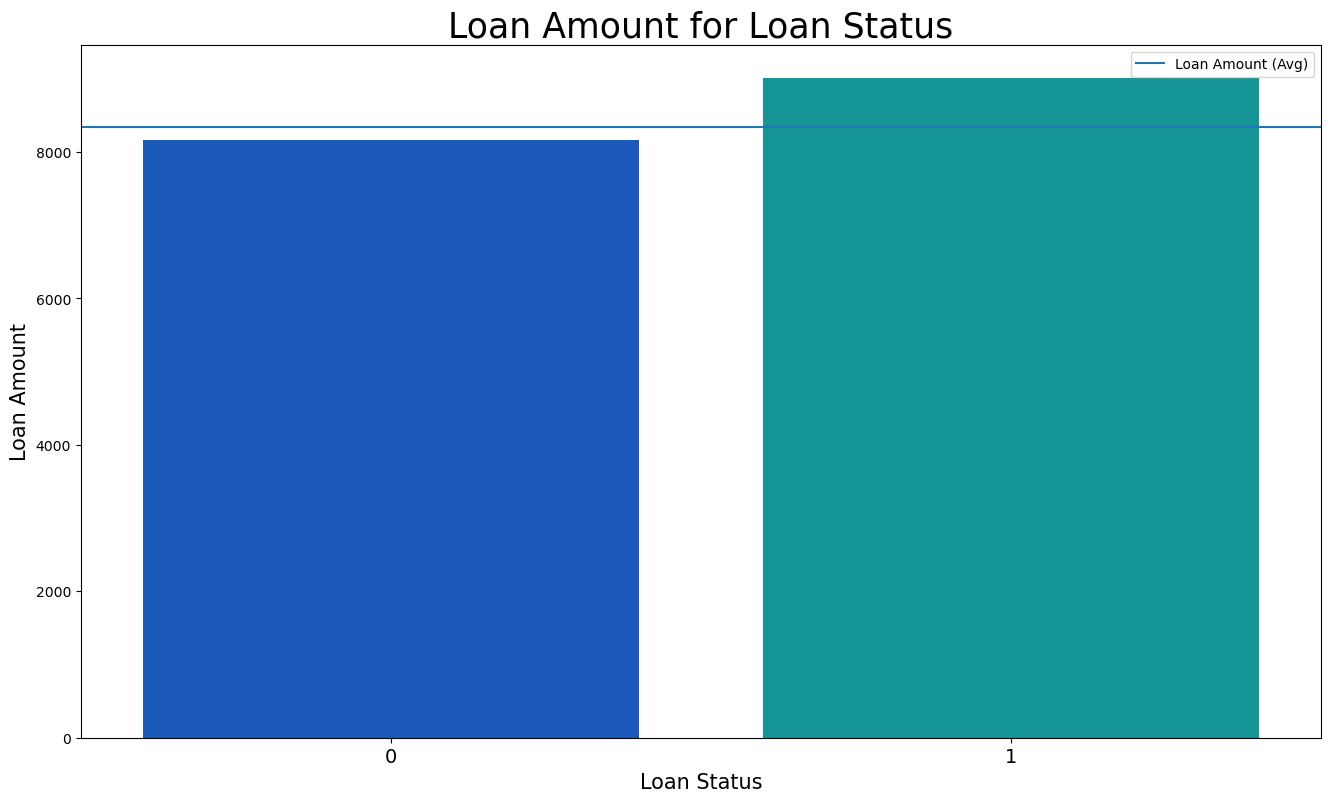

In [15]:
prepare.loan_amount(train)

In [16]:
prepare.hypothesis_loan_amnt(train)

Reject the null hypothesis that loan_amnt and loan_status are independent
Sufficient evidence to move forward understanding that there is a relationship between loan_status and loan_amnt


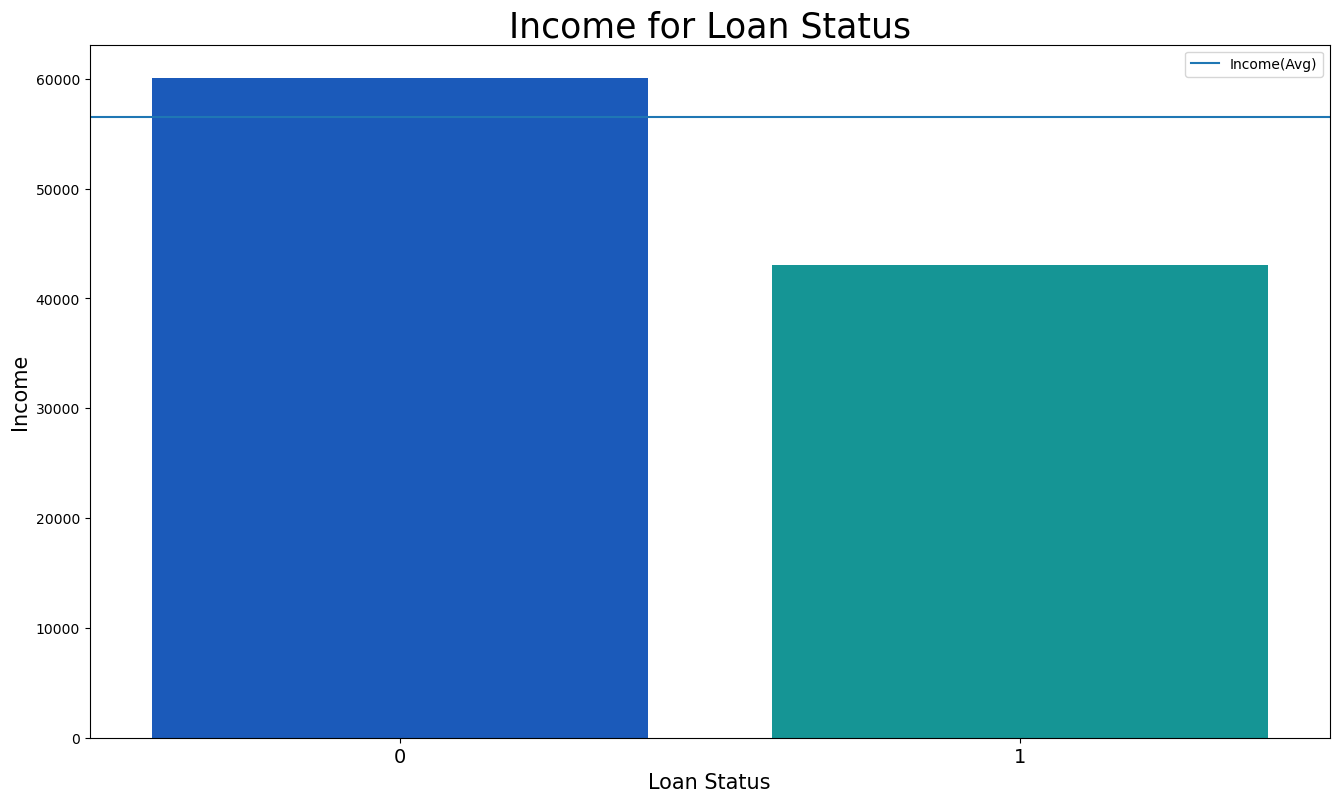

In [17]:
prepare.income_status(train)

In [18]:
prepare.hypothesis_income_status(train)

Reject the null hypothesis that income and loan_status are independent
Sufficient evidence to move forward understanding that there is a relationship between loan_status and income


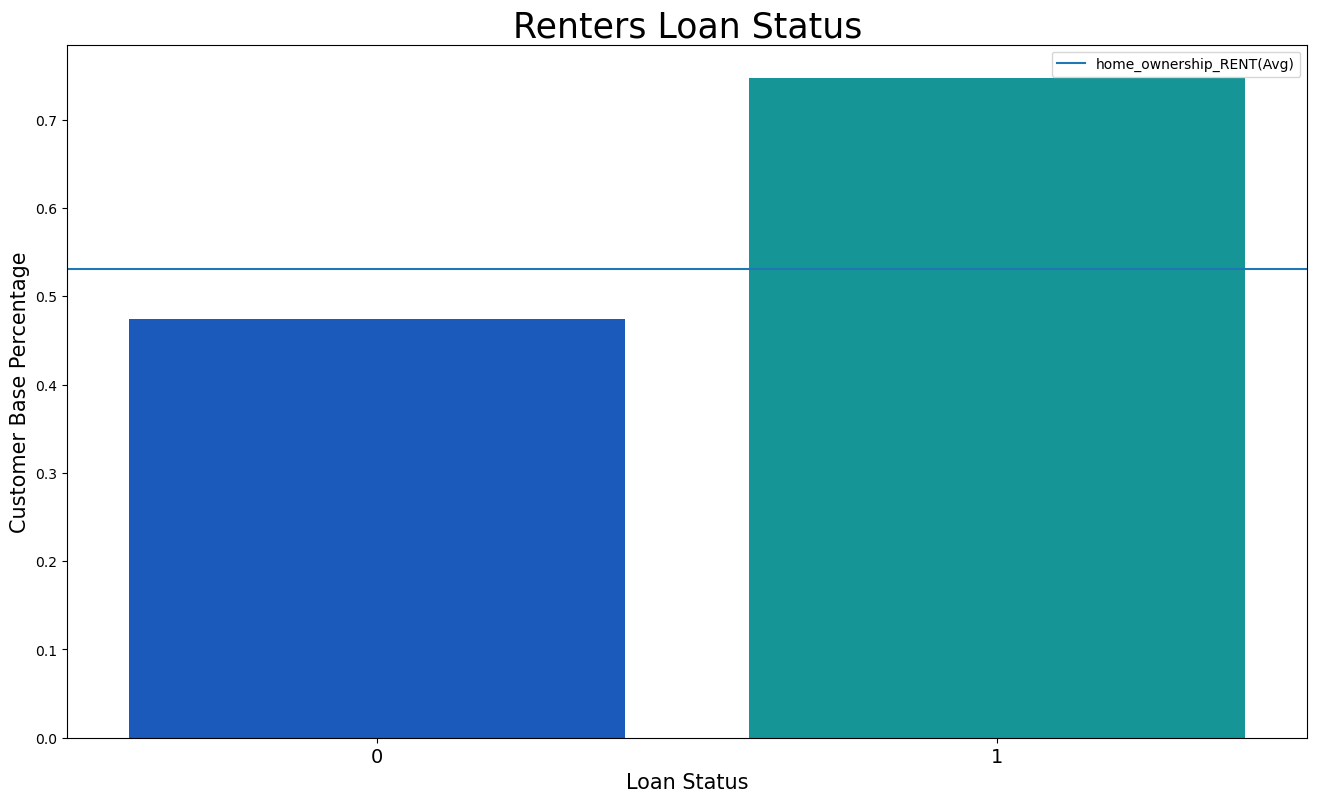

In [19]:
prepare.renters(train)

In [20]:
prepare.hypothesis_rent(train)

 Reject the null hypothesis that home_ownership_OWN and loan_status are independent
 Sufficient evidence to move forward understanding that
 there is a relationship between loan_status and home_ownership_OWN


# Exploration Summary

* We found home ownership status has a big impact on loan status
* The loan interest rate is a big decider on if the loan will default
* The higer percent the loan is of a customers income has a big impact on if the loan will default
* We will take all features into modeling in an attempt to give all avenues open for predicting a loans status

# Modeling
* Accuracy will be my evaluation metric
* The baseline accuracy is 78% not defaulted loan status
* The best model will be used against the test dataset


* We get our loan status values for baseline accuracy rate 
* Set our train, val, and test variables for modeling
* Review results of modeling

In [21]:
# Verify baseline decision 
train.loan_status.value_counts()

0    11611
1     3040
Name: loan_status, dtype: int64

In [22]:
# Calculate baseline accuracy
prepare.get_baseline(df)

78.18%


In [23]:
# Set our train, val, test variables
X_train = train.columns.to_list()
X_train.remove('loan_status')
y_train = 'loan_status'
X_val, y_val, = validate[X_train], validate[y_train]
X_test, y_test = test[X_train], test[y_train]

In [24]:
# Get performance of best model on test data. 
prepare.dt_model(df,train,X_train,y_train,X_val,y_val,X_test,y_test)

 Our best model has max_depth=9
 with an accuracy score of 0.93 on the validation data 
 and 0.92 on the test data
 Our baseline model has an accuracy score of 78.18%. Our created model has a baseline score of 92.11%


# Modeling Summary
* All decision tree models tested performed better than baseline 
* We found that a max depth of 9 was our best performing model
* Our model performed at 92% accuracy beating our original baseline

# Conclusions
* Loan default is significantly higher for our Renting customers 
* Income and loan amount have an impact on if a loan defaults
* Default was higher at higher loan amounts but was not a big difference compared to loans that are current.
* The percent the loan makes up of the actual income is even more of a deciding factor in a loan defaulting

# Recommendations
* Set credit guidelines that require applicants to qualify for lower interest rates
* Set a percent of income requirement for loan approval

# Next Steps
* Create a model that predicts high income earners probablity to default
* Find ways to address those customers need without opening us up to major default risk.